In [4]:
import sys
sys.path.append('..')
from neighbors.KNNRegressor import KNNRegressor

In [5]:
# Test KNNRegressor
def test_KNNRegressor():
    # Create a KNNRegressor object
    knn = KNNRegressor(3)

    

In [6]:
from sklearn.datasets import load_iris

# Load the iris dataset
data = load_iris()

In [7]:
# convert the data to a DataFrame
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column to the DataFrame
df['target'] = data.target

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


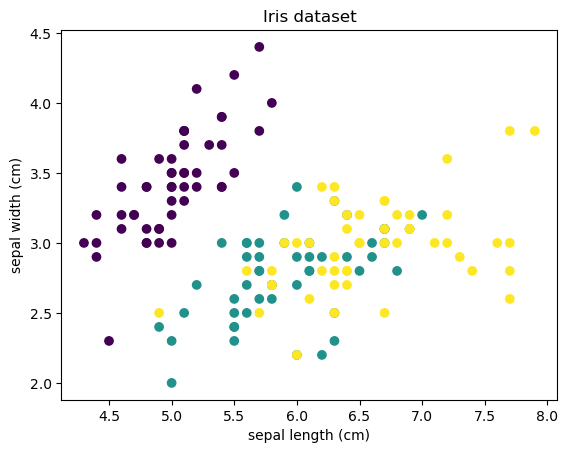

In [8]:
# we will try to visualise our data in 2D
import matplotlib.pyplot as plt

# we will use the first two features
x = df['sepal length (cm)']
y = df['sepal width (cm)']

plt.scatter(x, y, c=data.target)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Iris dataset')
plt.show()

[0.92461872 0.05306648]
0.977685206318795


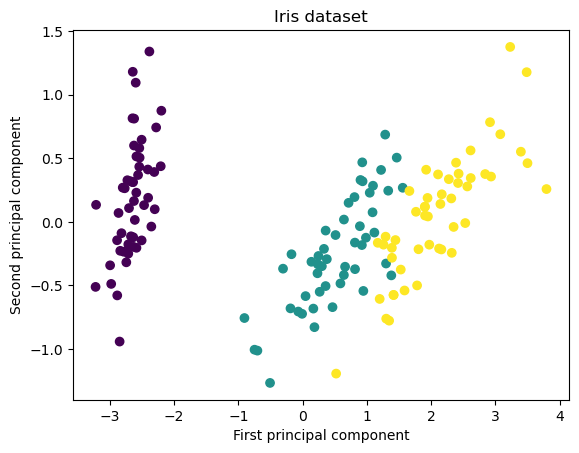

In [9]:
# we will use dimensionality reduction to visualise our data in 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(data.data)

# we will print the percentage of information that is preserved
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

# we will plot the data in 2D

plt.scatter(X[:, 0], X[:, 1], c=data.target)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Iris dataset')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNNRegressor object
knn = KNNRegressor(5)

# Fit the model
knn.fit(X_train, y_train)

# Predict the target values
y_pred = knn.predict(X_test)

# Print the predicted values
print(y_pred)



[1.  0.  2.  1.  1.  0.  1.  2.  1.4 1.  1.8 0.  0.  0.  0.  1.  2.  1.
 1.  2.  0.  1.8 0.  2.  2.  2.  2.  2.  0.  0. ]


In [11]:
# we will compare the performance of our model with the sklearn KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

# Create a KNeighborsRegressor object
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Predict the target values
y_pred_sklearn = knn.predict(X_test)

# Print the predicted values
print(y_pred_sklearn)

[1.  0.  2.  1.  1.  0.  1.  2.  1.4 1.  1.8 0.  0.  0.  0.  1.  2.  1.
 1.  2.  0.  1.8 0.  2.  2.  2.  2.  2.  0.  0. ]


In [12]:
# now we will compare the performance of our model with the sklearn KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error of our model
mse = mean_squared_error(y_test, y_pred)

# Calculate the mean squared error of the sklearn model
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)


print(mse)
print(mse_sklearn)

0.007999999999999997
0.007999999999999997


In [13]:
# we will import a larger dataset
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

# convert the data to a DataFrame
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column to the DataFrame
df['target'] = data.target

df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


[9.99789327e-01 1.13281110e-04 8.32834638e-05]
0.9999858913499902


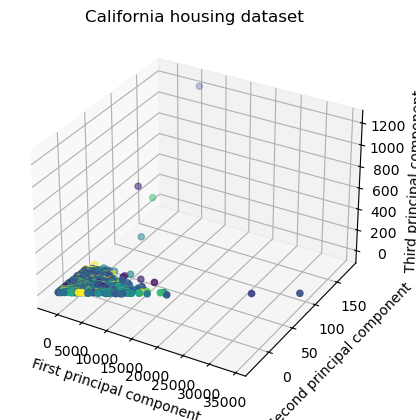

In [14]:
# we will use dimensionality reduction to visualise our data in 3D
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X = pca.fit_transform(data.data)

# we will print the percentage of information that is preserved
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

# we will plot the data in 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=data.target)
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_zlabel('Third principal component')
plt.title('California housing dataset')
plt.show()


In [15]:
# split the df into training and testing sets

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.002, random_state=42)


In [16]:
# Create a KNNRegressor object
knn = KNNRegressor(5)

# Fit the model
knn.fit(X_train, y_train)

# Predict the target values
y_pred = knn.predict(X_test)

# Print the predicted values
print(y_pred)


[1.623    1.0822   2.29     2.8098   1.9438   2.5532   2.2412   1.8562
 1.774    2.6872   1.286    1.2666   1.5862   2.4126   2.1616   1.6442
 2.1252   1.2804   2.4412   1.475    1.5932   2.3548   1.5682   1.5926
 1.7314   1.1848   2.136    2.18     1.7016   2.1798   0.9588   1.6258
 2.4364   2.4398   2.3792   1.7808   2.5566   1.5342   1.4338   2.957402
 1.7972   2.2952  ]


In [17]:

# we will compare the performance of our model with the sklearn KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

# Create a KNeighborsRegressor object
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Predict the target values
y_pred_sklearn = knn.predict(X_test)

# Print the predicted values
print(y_pred_sklearn)




[1.623    1.0822   2.29     2.8098   1.9438   2.5532   2.2412   1.8562
 1.774    2.6872   1.286    1.2666   1.5862   2.4126   2.1616   1.6442
 2.1252   1.2804   2.4412   1.475    1.5932   2.3548   1.5682   1.5926
 1.7314   1.1848   2.136    2.18     1.7016   2.1798   0.9588   1.6258
 2.4364   2.4398   2.3792   1.7808   2.5566   1.5342   1.4338   2.957402
 1.7972   2.2952  ]


In [18]:
# we will compare the performance of our model with the sklearn KNeighborsRegressor

# Calculate the mean squared error of our model
mse = mean_squared_error(y_test, y_pred)

# Calculate the mean squared error of the sklearn model
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)


print("for our model")
print(mse)
print("for sklearn model")
print(mse_sklearn)


for our model
1.3956708080429525
for sklearn model
1.3956708080429525


In [27]:
# we will plot the time taken to predict the target values in terms of the number of samples
# we will use the california housing dataset

import time

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

# we will use the first 1000 samples
X = data.data[:10000]

y = data.target[:10000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNNRegressor object
knn = KNNRegressor(5)

# each time we will fit the model with a different number of samples and calculate the time taken to predict one sample
samples = [10*i for i in range(1, 1000)]

times = []

for sample in samples:
    
    knn.fit(X_train[:sample], y_train[:sample])

    start = time.time()
    y_pred = knn.predict(X_test[0])
    end = time.time()
    times.append((end - start) / len(y_pred))


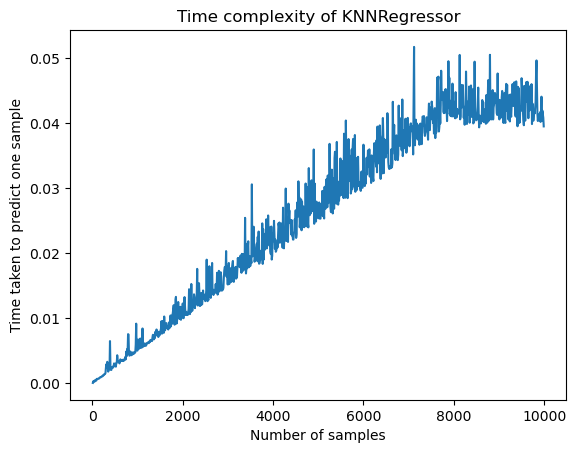

In [28]:
# we will plot the time taken to predict the target values in terms of the number of samples


plt.plot(samples, times)
plt.xlabel('Number of samples')
plt.ylabel('Time taken to predict one sample')
plt.title('Time complexity of KNNRegressor')
plt.show()
